# Problem-Solving

Solving problems is a different type of mental activity from learning syntax. For this reason, "understanding python" won't necessarily translate into good problem-solving skills.

In this notebook, we will go through a process a programmer would use when solving a relatively complex problem.

# Cropping images

Our task will be to crop an image to multiple smaller pieces, like this:

![](imgs/image-grid.jpg)

Let's say we want to feed a neural network with histopathology images, but we have a problem: our images are really large (2000x2000 px) and we want to split every image to 16 smaller (500x500 px) images.

### Divide and Conquer

The way you should think about this problem is not "How to split an image into 16 smaller ones?", but **"What is the simplest sub-problem I can solve?"**. 

Always "_Reduce the problem to the point where you know how to solve it and write the solution. Then expand the problem slightly and rewrite the solution to match, and keep going until you are back where you started._" - V. Anton Spraul (author of the book “Think Like a Programmer: An Introduction to Creative Problem Solving”).

In our case, **we will start by cropping just one image, and expand from there**.

![](imgs/image-grid_sub.jpg)

### Step I: Croping the upper left corner (red area)

Let's load our image first. For reading and writing images we will use [OpenCV library](https://docs.opencv.org/master/d1/dfb/intro.html).

In [1]:
import cv2

# For simplicity, we'll load the image in grayscale mode.
img = cv2.imread('imgs/mastocytoma_2000px.jpg', cv2.IMREAD_GRAYSCALE)

You should read the [official tutorial](https://docs.opencv.org/master/dc/d2e/tutorial_py_image_display.html) about reading and writing images in OpenCV.

Ok, we just loaded the image into variable **"img"**. Let's print it:

In [2]:
print(img)

[[223 215 216 ... 230 233 232]
 [221 214 216 ... 226 231 233]
 [218 214 216 ... 221 230 235]
 ...
 [211 212 212 ... 210 210 208]
 [211 212 212 ... 211 210 209]
 [212 213 213 ... 211 212 213]]


In computer memory, black and white images are represented with two-dimensional arrays (matrices) in which every pixel has an intensity between 0 and 255, with 0 being black and 255 being white.

![](imgs/imagematrix.png)

Our two-dimensional array is actually a **nested list**. If you don't know what nested lists are, you should read this [Quick Overview of Nested Lists in Python](https://www.dreamincode.net/forums/topic/193487-a-quick-overview-of-nested-lists-in-python/)

You should also read something about [indexing and slicing](https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/).

Now when you know what nested lists are and how indexing and slicing work, we can finally crop our first image!

... but first, let's experiment a little bit with list indexing and slicing:

In [3]:
print(img[0]) # prints the first row

[223 215 216 ... 230 233 232]


In [4]:
print(img[1, 0]) # prints the first pixel in second row

221


In [5]:
print(img[:]) # prints the whole image

[[223 215 216 ... 230 233 232]
 [221 214 216 ... 226 231 233]
 [218 214 216 ... 221 230 235]
 ...
 [211 212 212 ... 210 210 208]
 [211 212 212 ... 211 210 209]
 [212 213 213 ... 211 212 213]]


In [6]:
print(img[:, 0]) # prints the first column

[223 221 218 ... 211 211 212]


In [7]:
print(img[:500]) # prints the first 500 rows

[[223 215 216 ... 230 233 232]
 [221 214 216 ... 226 231 233]
 [218 214 216 ... 221 230 235]
 ...
 [207 199 192 ... 200 200 202]
 [212 208 201 ... 201 200 200]
 [201 207 210 ... 208 206 204]]


In [8]:
print(img[:, :500]) # prints the first 500 columns

[[223 215 216 ... 167 169 171]
 [221 214 216 ... 171 164 163]
 [218 214 216 ... 181 170 165]
 ...
 [211 212 212 ... 209 208 207]
 [211 212 212 ... 207 208 209]
 [212 213 213 ... 205 208 210]]


In [9]:
# from first 500 rows prints first 500 columns
# in other words, it crops the 500x500 px image from the upper left corner
print(img[:500, :500])

[[223 215 216 ... 167 169 171]
 [221 214 216 ... 171 164 163]
 [218 214 216 ... 181 170 165]
 ...
 [207 199 192 ... 183 182 183]
 [212 208 201 ... 188 186 186]
 [201 207 210 ... 196 193 193]]


Let's put this into a variable and display it using matplotlib:

In [10]:
crop = img[:500, :500]

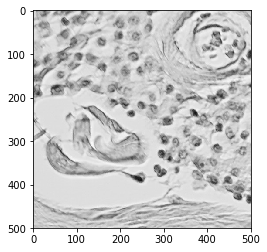

In [12]:
from matplotlib import pyplot as plt

plt.imshow(crop, cmap='gray')

### Step II: Cropping images from red AND yellow area

![](imgs/image-grid_sub.jpg)

We We successfully cropped upper left corner. To crop the images from the first row (red and yellow area) we need to add a **for loop**. There are four images in the first row, so we need to loop four times.

In [12]:
n = 4 # number of images in a row

for i in range(n):
    print(i)

0
1
2
3


Great! We have the for loop that iterates four times. Let's add our code for cropping:

In [13]:
n = 4 # number of images in a row

# you don't need to write this line in one take;
# you can take the same "reduce the problem 
# technique" we are learning here.
# you could start with "print(len(img))"...
# ...than change it to "print(len(img) / n)"
# and after seeing that the output is float instead of integer write:
sz = int(len(img) / n) # size of cropped images (500)

for i in range(n):
    #print(i)
    crop = img[:sz, :sz]
    #print('\n',  crop)
    cv2.imwrite('crop.jpg', crop)

This code crops **the same upper-left corner** four times and saves the images onto the hard drive. In order to get a "sliding window", we need to modify this code slightly.

In [14]:
n = 4
sz = int(len(img) / n)


for i in range(n):
    #print(i)
    crop = img[:sz, (i*sz):(i*sz)+sz]
    
    # you can uncomment this line to print above values;
    # remember: if you don't understand what is happening, you can always print values
    #print(str(sz), str(i*sz) + ':' + str((i*sz)+sz))
    
    cv2.imwrite('crop_' + str(i) + '.jpg', crop)

### Step III: Cropping all 16 images

To crop all images we just need to add another "for loop".

In [15]:
n = 4
sz = int(len(img) / n)


for i in range(n):
    for j in range(n):
        crop = img[(i*sz):(i*sz)+sz, (j*sz):(j*sz)+sz]
        cv2.imwrite('crop_' + str(i) + str(j) + '.jpg', crop)

This is the first code I wrote solving this problem. It does the job, but it is quite ugly! More experienced programmers would write something like this:

In [16]:
n = 4
sz = int(img.shape[0] / n)

for r in range(0, img.shape[0], sz):
    for c in range(0, img.shape[1], sz):
        cv2.imwrite(f"img{r}_{c}.jpg", img[r:r+sz, c:c+sz])

The same code will work with color images!

### Summary

1. Always try to break your problems into sub-problems that are much easier to solve.
2. If you don't understand what is happening in the code just print() the input and outputs.